Fetching dataset

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
!pip install tensorflow

In [11]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [12]:
(X_train,y_train),(X_test,y_test) = keras .datasets.mnist.load_data()

View the dataset

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


view the dataset value index

In [14]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

plot the dataset using imshow() function of matplotlib

0


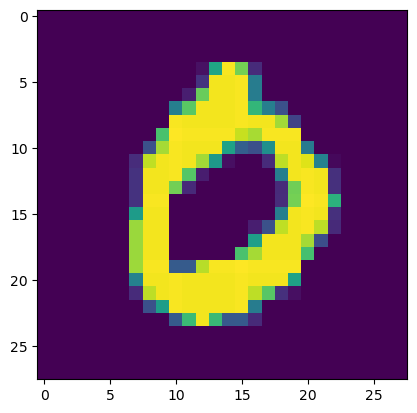

In [15]:
plt.imshow(X_test[3])
print(y_test[3])

scaling the values from 0-1

In [16]:
X_train = X_train/255
X_test = X_test/255

In [17]:
X_train[3]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

start the model building

In [18]:
model = Sequential()

flatten the model from 28*28 to 1D

In [19]:
model.add(Flatten(input_shape=(28,28))) 
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer= 'Adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
history=model.fit(X_train,y_train,batch_size = 64 ,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8432 - loss: 0.5549 - val_accuracy: 0.9503 - val_loss: 0.1811
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9529 - loss: 0.1665 - val_accuracy: 0.9619 - val_loss: 0.1353
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9670 - loss: 0.1143 - val_accuracy: 0.9674 - val_loss: 0.1128
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9754 - loss: 0.0842 - val_accuracy: 0.9709 - val_loss: 0.1017
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9797 - loss: 0.0681 - val_accuracy: 0.9728 - val_loss: 0.0941
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9845 - loss: 0.0529 - val_accuracy: 0.9714 - val_loss: 0.0997
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9888 - loss: 0.0417 - val_accuracy: 0.9734 - val_loss: 0.0913
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9907 - loss: 0.0350 - val_accuracy: 0.

In [23]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9709 - loss: 0.0972


[0.08337581902742386, 0.9751999974250793]

In [24]:
model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[3.0630340e-09, 3.0142666e-11, 4.4475367e-08, ..., 9.9996090e-01,
        1.5382236e-07, 7.7436141e-07],
       [2.9358009e-09, 7.6274699e-07, 9.9999857e-01, ..., 2.3378265e-17,
        1.1428360e-08, 6.7819895e-16],
       [5.3925960e-06, 9.9846578e-01, 1.4842374e-04, ..., 5.9371506e-04,
        5.1434262e-04, 1.9324563e-05],
       ...,
       [4.9235594e-12, 3.7986010e-11, 1.4345038e-14, ..., 8.3181831e-08,
        8.1956237e-09, 9.8089113e-06],
       [1.0774323e-11, 5.5633415e-12, 3.7938091e-13, ..., 1.2204418e-10,
        4.4945082e-06, 1.7778124e-11],
       [5.4376681e-10, 2.0646354e-13, 9.9693628e-11, ..., 2.2019123e-14,
        1.9219706e-11, 2.1244553e-11]], dtype=float32)

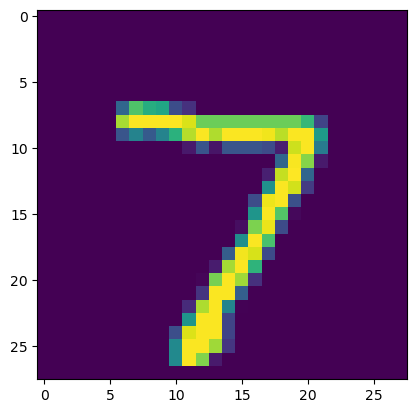

In [25]:
plt.imshow(X_test[0])

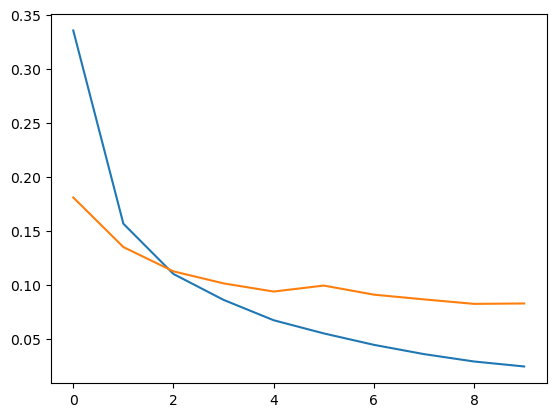

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

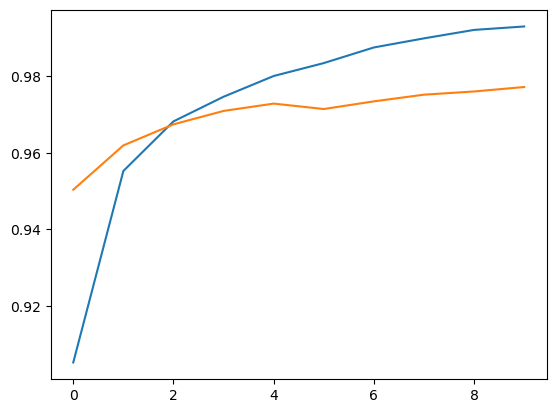

In [27]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [30]:
model.save('mnist_model.keras')

In [ ]:
import tkinter as tk
from tkinter import messagebox
import numpy as np
import tensorflow as tf
from PIL import Image, ImageGrab, ImageOps

# Load the trained model
model_path = 'saved_model/mnist_model.h5'
model = tf.keras.models.load_model(model_path)

# Create the main application window
root = tk.Tk()
root.title("Digit Recognizer")

# Create a canvas for drawing
canvas = tk.Canvas(root, width=280, height=280, bg='white')
canvas.grid(row=0, column=0, columnspan=4)

# Initialize drawing state
is_drawing = False

# Functions to handle drawing on the canvas
def start_draw(event):
    global is_drawing
    is_drawing = True
    canvas.create_oval(event.x, event.y, event.x+10, event.y+10, fill='black', width=10)

def draw(event):
    if is_drawing:
        canvas.create_oval(event.x, event.y, event.x+10, event.y+10, fill='black', width=10)

def stop_draw(event):
    global is_drawing
    is_drawing = False

canvas.bind('<Button-1>', start_draw)
canvas.bind('<B1-Motion>', draw)
canvas.bind('<ButtonRelease-1>', stop_draw)

# Function to clear the canvas
def clear_canvas():
    canvas.delete('all')

# Function to predict the digit
def predict_digit():
    # Capture the canvas image
    x = root.winfo_rootx() + canvas.winfo_x()
    y = root.winfo_rooty() + canvas.winfo_y()
    x1 = x + canvas.winfo_width()
    y1 = y + canvas.winfo_height()
    image = ImageGrab.grab().crop((x, y, x1, y1)).convert('L')

    # Invert the image (to match MNIST format)
    image = ImageOps.invert(image)

    # Resize and preprocess the image
    image = image.resize((28, 28))
    image = np.array(image).reshape(1, 28, 28, 1)
    image = image / 255.0

    # Predict the digit
    prediction = model.predict(image)
    predicted_digit = np.argmax(prediction)

    # Display the prediction
    messagebox.showinfo("Prediction", f"The predicted digit is: {predicted_digit}")

# Create buttons for clearing the canvas and predicting the digit
clear_button = tk.Button(root, text="Clear", command=clear_canvas)
clear_button.grid(row=1, column=0, pady=10)

predict_button = tk.Button(root, text="Predict", command=predict_digit)
predict_button.grid(row=1, column=1, pady=10)

# Start the Tkinter event loop
root.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
